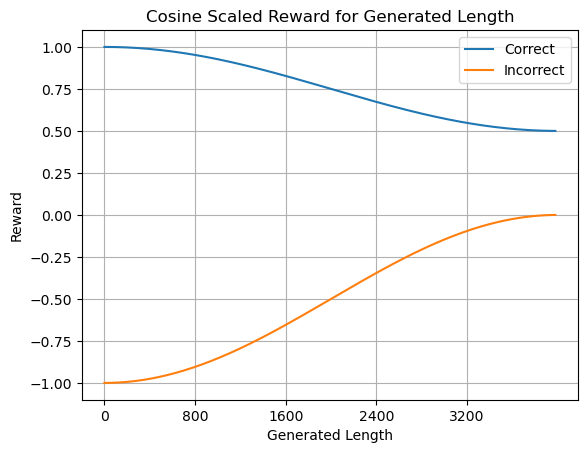

<Figure size 1500x480 with 0 Axes>

<Figure size 640x3000 with 0 Axes>

In [29]:
import math
import matplotlib.pyplot as plt

def get_cosine_scaled_reward(
    gen_len,
    min_value_wrong: float = -1.0,
    max_value_wrong: float = 0,
    min_value_correct: float = 0.5,
    max_value_correct: float = 1.0,
    max_len: int = 8000,
    is_correct=1,
):
    # Apply cosine scaling based on length
    progress = gen_len / max_len
    cosine = math.cos(progress * math.pi)

    if is_correct:
        min_value = min_value_correct
        max_value = max_value_correct
    else:
        # Swap min/max for incorrect answers
        min_value = max_value_wrong
        max_value = min_value_wrong

    reward = min_value + 0.5 * (max_value - min_value) * (1.0 + cosine)
    return reward


def plot_cosine_scaled_rewards(max_len=4000):
    gen_lens = list(range(0, max_len, 20))
    is_corrects = [1] * len(gen_lens)
    right_rewards = []
    for gen_len, is_correct in zip(gen_lens, is_corrects):
        reward = get_cosine_scaled_reward(gen_len, is_correct=is_correct, max_len=max_len)
        right_rewards.append(reward)

    wrongs = [0] * len(gen_lens)
    wrong_rewards = []
    for gen_len, wrong in zip(gen_lens, wrongs):
        reward = get_cosine_scaled_reward(gen_len, is_correct=wrong, max_len=max_len)
        wrong_rewards.append(reward)
    
    step = max_len // 5
    plt.plot(gen_lens, right_rewards, label='Correct')
    plt.plot(gen_lens, wrong_rewards, label='Incorrect')
    plt.legend()
    plt.xticks(list(range(0, max_len, step)))
    plt.grid(True)
    plt.title('Cosine Scaled Reward for Generated Length')
    plt.ylabel('Reward')
    plt.xlabel('Generated Length')
    plt.figure().set_figwidth(15)
    plt.figure().set_figheight(30)
    plt.savefig('cosine_scaled_rewards.jpg')
    plt.show()


plot_cosine_scaled_rewards()


In [ ]:
# n-gram的举例, LLM生成的答案 hello world this is a test
# n-gram为3，切分为
# [('hello', 'world', 'this'), ('world', 'this', 'is'), ('this', 'is', 'a'), ('is', 'a', 'test')]
# n-gram为4，切分为
# [('hello', 'world', 'this', 'is'), ('world', 'this', 'is', 'a'), ('this', 'is', 'a', 'test')]
s = 'hello world this is a test'

def zipngram(text: str, ngram_size: int):

    words = text.lower().split()
    return zip(*[words[i:] for i in range(ngram_size)])

print(list(zipngram(s, 3)))
print(list(zipngram(s, 4)))


def zipngram2(text: str, ngram_size: int):
    words = text.lower().split()
    res = [(words[i:i+ngram_size]) for i in range(len(words) - ngram_size + 1)]
    return res

# zipngram2 is much better than zipngram, because it is more readable!
print(zipngram2(s, 3))
print(zipngram2(s, 4))

[('hello', 'world', 'this'), ('world', 'this', 'is'), ('this', 'is', 'a'), ('is', 'a', 'test')]
[('hello', 'world', 'this', 'is'), ('world', 'this', 'is', 'a'), ('this', 'is', 'a', 'test')]
[['hello', 'world', 'this'], ['world', 'this', 'is'], ['this', 'is', 'a'], ['is', 'a', 'test']]
[['hello', 'world', 'this', 'is'], ['world', 'this', 'is', 'a'], ['this', 'is', 'a', 'test']]
